# Sommaire

 [Import et nettoyage du jeu de données](#Imp)  

 [1.Chiffre d'affaire par année(Barchart)](#CA)  

 [2.Chiffre d'affaire par année et par catégorie(Barchart)](#CA1)

 [3.Taux de croissance par année](#Cro)

 [4.Taux de croissance en "year to date"](#Cro1)

 [5.Age moyen des clients en base aujourd'hui](#Age)

 [6.Age moyen des clients au moment de l'achat](#Age1)

 [7.Age moyen des clients par année](#Age2)

 [8.Age moyen des clients au global](#Age3)

 [9.Qualité du jeu de données](#Qua)

<a name="Imp"></a>
## **Import et nettoyage du jeu de données** 

Import des libraries et des jeux de données

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt

In [ ]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

customers = pd.read_csv(PATH + 'customers.csv')
orders = pd.read_csv(PATH + 'orders.csv')
clients = customers.copy()

Mounted at /content/drive


###Import des données

In [ ]:
customers["date_birth"]=customers["date_birth"].str[0:4]
customers["date_birth"]=customers["date_birth"].astype(float)
customers["date_birth"]=customers["date_birth"].fillna(customers['date_birth'].median())
customers["date_birth"]=customers["date_birth"].astype(int)
customers = customers.rename(columns={"date_birth":"year_birth"})
customers.head()

,customer_unique_id,country,gender,propriétaire,habitat,nb_pages_visited,year_birth,sms_defined
0,1,France,NaN,Locataire,Locataire,4.0,1962,yes
1,2,China,Female,Propriétaire,Propriétaire,8.0,1994,no
2,3,China,Female,Locataire,Locataire,5.0,1984,no
3,4,Belgium,Female,Locataire,Locataire,6.0,1989,yes
4,5,China,NaN,Propriétaire,Locataire,6.0,1967,no


In [ ]:
customers.describe()

,nb_pages_visited,year_birth
count,1999.000000,2000.000000
mean,5.572286,1980.829500
std,2.756129,17.761226
min,1.000000,1900.000000
25%,4.000000,1977.000000
50%,6.000000,1984.000000
75%,7.000000,1990.000000
max,15.000000,2003.000000


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  2000 non-null   object 
 1   country             1999 non-null   object 
 2   gender              1795 non-null   object 
 3   propriétaire        1999 non-null   object 
 4   habitat             1999 non-null   object 
 5   nb_pages_visited    1999 non-null   float64
 6   year_birth          2000 non-null   int64  
 7   sms_defined         1998 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


In [ ]:
customers.describe()

,nb_pages_visited,year_birth
count,1999.000000,2000.000000
mean,5.572286,1980.829500
std,2.756129,17.761226
min,1.000000,1900.000000
25%,4.000000,1977.000000
50%,6.000000,1984.000000
75%,7.000000,1990.000000
max,15.000000,2003.000000


In [ ]:
orders.head()

,date,customer_id,category,sub_category,price
0,2018-11-18,1,Accessories,Locks,37.2
1,2019-01-31,1,Accessories,Locks,35.7
2,2019-04-15,1,Riders gears,Shoes,24.7
3,2019-06-28,1,Riders gears,Shoes,79.5
4,2019-09-10,1,Accessories,GPS,135.8


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16393 entries, 0 to 16392
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          16393 non-null  object 
 1   customer_id   16393 non-null  int64  
 2   category      16393 non-null  object 
 3   sub_category  16393 non-null  object 
 4   price         16393 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 640.5+ KB


In [ ]:
orders.describe()

,customer_id,price
count,16393.000000,16393.000000
mean,978.893552,269.977606
std,585.900781,717.174433
min,1.000000,10.000000
25%,460.000000,36.700000
50%,985.000000,54.300000
75%,1485.000000,124.800000
max,2000.000000,6623.100000


###Données manquantes

In [ ]:
customers.isnull().sum()

customer_unique_id      0
country                 1
gender                205
propriétaire            1
habitat                 1
nb_pages_visited        1
year_birth              0
sms_defined             2
dtype: int64

In [ ]:
orders.isnull().sum()

date            0
customer_id     0
category        0
sub_category    0
price           0
dtype: int64

<a name="CA"></a>
## **1.Chiffre d'affaire par année(Barchart)** 

On va ici travailler seulement avec les années pour les clients.

In [ ]:
orders["date"]=orders["date"].str[0:4]
orders["date"]=orders["date"].astype(int)

date
2017        320.8
2018      30216.2
2019     215934.9
2020     657850.1
2021    1059544.3
2022    2282634.4
2023     179242.2
Name: price, dtype: float64

Text(0, 0.5, 'Année')

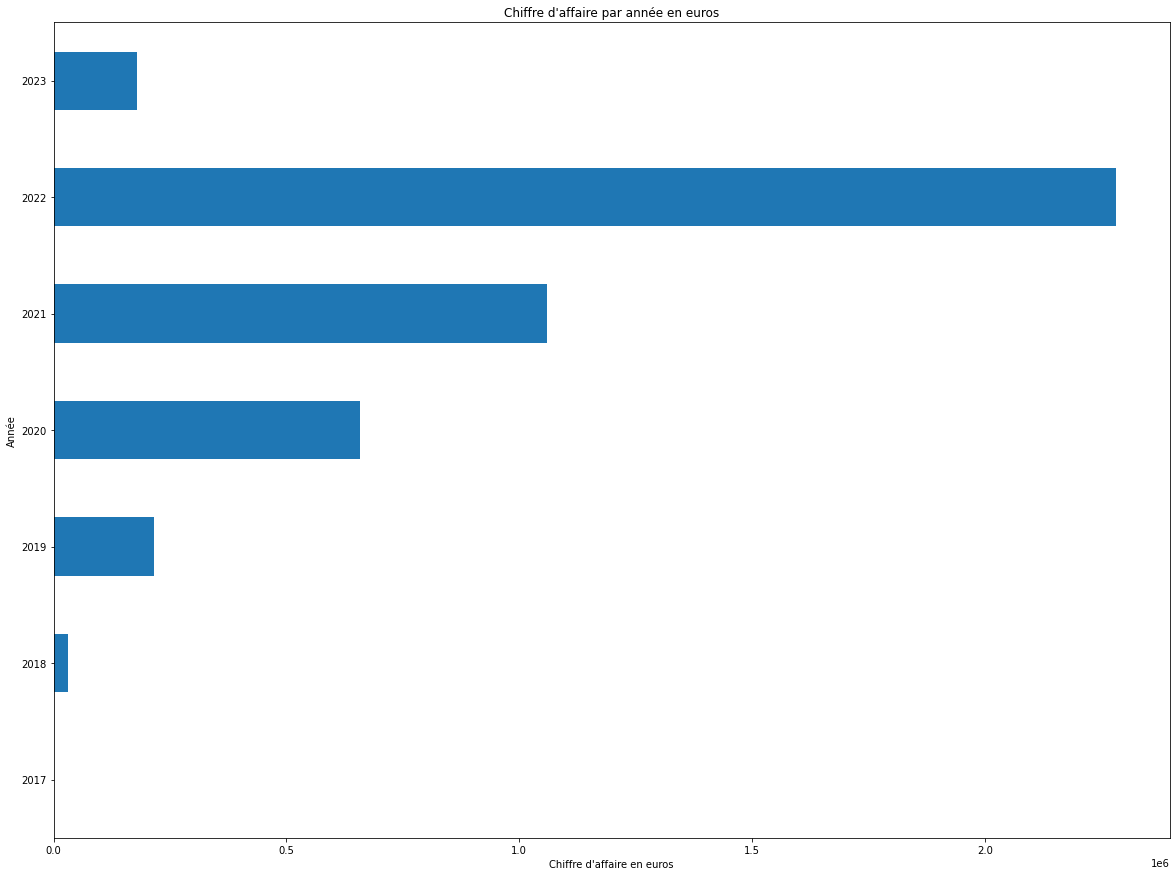

In [ ]:
CA=orders.groupby(["date"])["price"].sum()
display(CA)
CA.plot.barh(figsize=(20, 15))
plt.pyplot.title("Chiffre d'affaire par année en euros")
plt.pyplot.xlabel("Chiffre d'affaire en euros")
plt.pyplot.ylabel("Année")

<a name="CA1"></a>
## **2.Chiffre d'affaire par année et par catégorie(Barchart)** 

Ici on va regarder le chiffre d'affaire pour chaque catégorie et aussi pour chaque sous-catégorie si on veut rentrer dans les détails.

In [ ]:
orders["category"].unique()

array(['Accessories', 'Riders gears', 'Bikes'], dtype=object)

In [ ]:
orders["sub_category"].unique()

array(['Locks', 'Shoes', 'GPS', 'Gloves', 'Pumps', 'Jackets', 'Helmets',
       'Mountain Bikes', 'Roads', 'eBikes'], dtype=object)

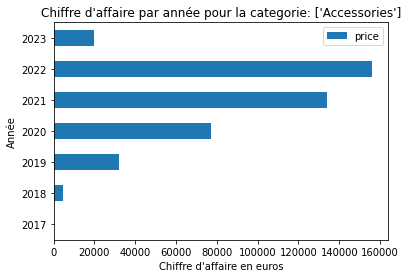

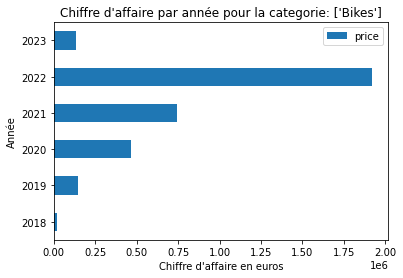

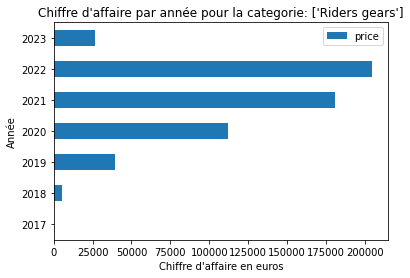

In [ ]:
dfx = [y for x, y in orders.groupby('category', as_index=False)]

for i in range(0,3):
  data = dfx[i].groupby(['date']).agg({'price': 'sum'})
  X = f'{"categorie"}: {dfx[i]["category"].unique()}'
  data.plot.barh()
  plt.pyplot.title("Chiffre d'affaire par année pour la " + str(X))
  plt.pyplot.xlabel("Chiffre d'affaire en euros")
  plt.pyplot.ylabel("Année")



In [ ]:
dfs = [y for x, y in orders.groupby('sub_category', as_index=False)]

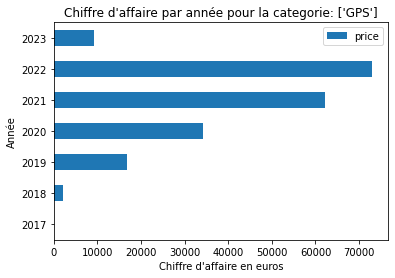

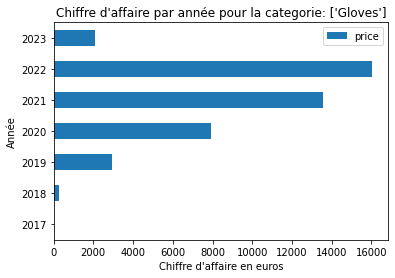

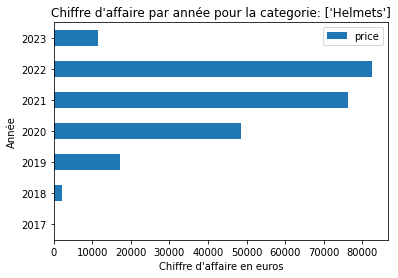

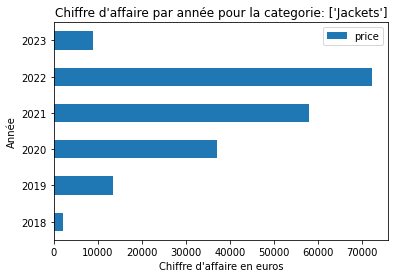

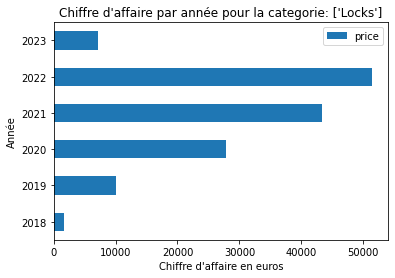

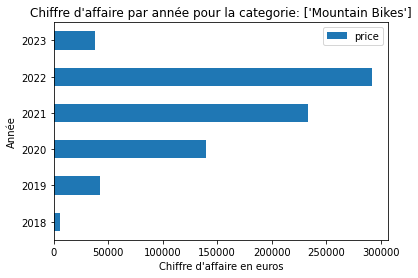

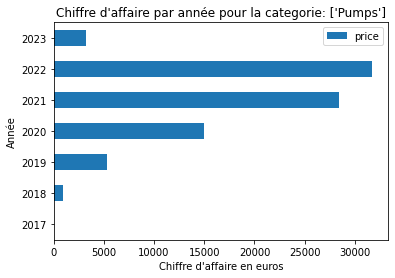

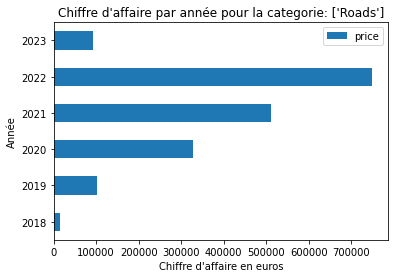

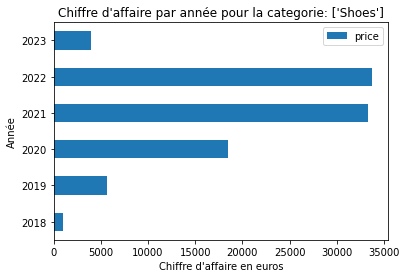

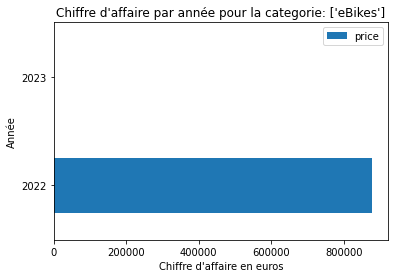

In [ ]:
for i in range(0,10):
  data = dfs[i].groupby(['date']).agg({'price': 'sum'})
  X = f'{"categorie"}: {dfs[i]["sub_category"].unique()}'
  data.plot.barh()
  plt.pyplot.title("Chiffre d'affaire par année pour la " + str(X))
  plt.pyplot.xlabel("Chiffre d'affaire en euros")
  plt.pyplot.ylabel("Année")


In [ ]:
CA = pd.DataFrame(CA)
CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2017 to 2023
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   7 non-null      float64
dtypes: float64(1)
memory usage: 112.0 bytes


<a name="Cro"></a>
## **3.Taux de croissance par année** 

In [ ]:
CA["taux_croissance_en_pourcent"] = 100 * (CA["price"] - CA["price"].shift()) / abs(CA["price"].shift())

In [ ]:
CA

,price,taux_croissance_en_pourcent
date,,
2017,320.8,NaN
2018,30216.2,9319.014963
2019,215934.9,614.632879
2020,657850.1,204.652050
2021,1059544.3,61.061661
2022,2282634.4,115.435485
2023,179242.2,-92.147573


<a name="Cro1"></a>
## **4.Taux de croissance year to date entre 2022 et 2023** 

In [ ]:
CA['date']=CA.index

In [ ]:
CA2022_yeartodate = CA.loc[CA['date'] == 2022]
CA2023_yeartodate = CA.loc[(CA['date'] == 2022) | (CA['date'] == 2023)]

In [ ]:
Tauxcroissance_yeartodate = 100 * ((CA2023_yeartodate['price'].sum()) - (CA2022_yeartodate['price'].sum()))/(CA2022_yeartodate['price'].sum())
display(Tauxcroissance_yeartodate)

7.852427002764884

<a name="Age"></a>
## **5.Age moyen des clients en base aujourd'hui** 

In [ ]:
customers['age'] = 2023 - customers ['year_birth']

In [ ]:
moyenne = customers['age'].mean()
display(round(moyenne,1))

42.2

Les clients ont en moyenne 42.2 années 

<a name="Age1"></a>
## **6.Age moyen des clients au moment de l'achat** 

In [ ]:
customers['customer_unique_id']

0          1
1          2
2          3
3          4
4          5
        ... 
1995    1996
1996    1997
1997    1998
1998    1999
1999    2000
Name: customer_unique_id, Length: 2000, dtype: object

In [ ]:
customers["customer_unique_id"]=customers["customer_unique_id"].str[0:4]

In [ ]:
customers["customer_unique_id"]=customers["customer_unique_id"].astype('int')

In [ ]:
orders = orders.rename(columns={"customer_id": "customer_unique_id"})

In [ ]:
database = orders.merge(customers, on='customer_unique_id')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16393 entries, 0 to 16392
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                16393 non-null  int64  
 1   customer_unique_id  16393 non-null  int64  
 2   category            16393 non-null  object 
 3   sub_category        16393 non-null  object 
 4   price               16393 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 640.5+ KB


In [ ]:
database['age_at_order'] = database ['date'] - database ['year_birth']

In [ ]:
age_moyen_achat = database['age_at_order'].mean()
display(age_moyen_achat)

39.5427104973726

<a name="Age2"></a>
## **7.Age moyen des clients par année** 



In [ ]:
database_avg = database.groupby("date")['age'].mean()
display(database_avg)

date
2017    48.500000
2018    43.064706
2019    41.023788
2020    41.359303
2021    41.390109
2022    41.502002
2023    41.354414
Name: age, dtype: float64

<a name="Age3"></a>
## **8.Age moyen des clients au global** 

In [ ]:
database['country'] = database['country'].fillna('Rest of the world')
database['country'].unique()

array(['France', 'China', 'Belgium', 'USA', 'Austria',
       'Rest of the world'], dtype=object)

In [ ]:
dataworld = database.groupby("country")['age'].mean()

In [ ]:
dataworld

country
Austria              42.908163
Belgium              41.344678
China                40.002190
France               41.844739
Rest of the world    39.000000
USA                  42.090025
Name: age, dtype: float64

In [ ]:
dataworld = pd.DataFrame(dataworld)

In [ ]:
moyenne_age_global = dataworld['age'].mean()
display(moyenne_age_global)

41.19829917643023

<a name="Qua"></a>
## **9.Qualité du jeu de données** 

Dans son ensemble, le jeu de données est relativement de bonne qualité avec des données manquantes n'étant pas trop nombreuses et des données exploitables. Cependant, on notera que dans cetté étude de cas, pas mal de features nous sont inutiles telles que le genre, ou le statut des clients. Je parle bien pour les questions qui ont été posées ici. On peut donc en perspective faire un df.drop si jamais on veut supprimer ces features.